# Text Mining Amazon Reviews

In [2]:
from bs4 import BeautifulSoup as bs #Beautiful Soup is a Python library for pulling data out of HTML and XML files.
import requests # making HTTP requests in Python

In [3]:
bt='https://www.amazon.in'
ul='https://www.amazon.in/Apple-MacBook-Air-13-3-inch-MQD32HN/product-reviews/B073Q5R6VR/ref=cm_cr_getr_d_paging_btm_next_30?ie=UTF8&reviewerType=all_reviews'

In [279]:
cust_name = []   #define list to store Name of the customers
review_title = []
rate = []
review_content = []

In [280]:
tt = 0
while tt == 0:
    page = requests.get(ul)
    while page.ok == False:#if it fails to connect then this loop will be executing continuously until get response from site  
        page = requests.get(ul)
   

    soup = bs(page.content,'html.parser')
    soup.prettify()       #Prettify() function in BeautifulSoup will enable us to view how the tags are nested in the document.
    
    names = soup.find_all('span', class_='a-profile-name')
    names.pop(0)
    names.pop(0)
    
    for i in range(0,len(names)):
        cust_name.append(names[i].get_text())
        
    title = soup.find_all("a",{"data-hook":"review-title"})
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())

    rating = soup.find_all('i',class_='review-rating')
    rating.pop(0)
    rating.pop(0)
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    review = soup.find_all("span",{"data-hook":"review-body"})
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        
    try:
        for div in soup.findAll('li', attrs={'class':'a-last'}):
            A = div.find('a')['href']
        ul = bt + A
    except:
        break

In [281]:
len(cust_name)

9

In [282]:
len(review_title)

9

In [283]:
len(review_content)

9

In [284]:
len(rate)

9

In [285]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]

review_title[:] = [titles.rstrip('\n') for titles in review_title]

review_content[:] = [titles.lstrip('\n') for titles in review_content]

review_content[:] = [titles.rstrip('\n') for titles in review_content]

In [286]:
!pip install -U textblob
!python -m textblob.download_corpora
!pip install wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob, Word, Blobber
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
!pip install nltk
nltk.download('stopwords')

Requirement already up-to-date: textblob in c:\users\pcs\anaconda3\lib\site-packages (0.15.3)
Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\pcs\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pcs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pcs\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pcs\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\pcs\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\pcs\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pcs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [287]:
df = pd.DataFrame()

In [288]:
df['Customer Name'] = cust_name
df['Review Title'] = review_title
df['Rating'] = rate
df['Reviews'] = review_content

In [289]:
df.head(10)

,Customer Name,Review Title,Rating,Reviews
0,Sam,Best thing to buy,5.0 out of 5 stars,I spend hours in the comparative analysis of...
1,karthikeyan subramanian,Awesome Product,5.0 out of 5 stars,Thanks to Amazon and the seller for selling ...
2,Isak Z.,Excellent product,5.0 out of 5 stars,Excellent product. Recommended
3,Sunil Gadge,Excellent,5.0 out of 5 stars,Excellent
4,Guri,happy,5.0 out of 5 stars,good
5,Sajal K.,Good,5.0 out of 5 stars,Good
6,Aarish Khanna,👌,5.0 out of 5 stars,👍👍👍
7,Loyal Customer,Super product,5.0 out of 5 stars,Good value
8,An,No..words 😍😍😘😘,5.0 out of 5 stars,Not for gamingIt's for those who.want to buy...


In [290]:
df.to_csv(r'E:fill.csv',index = True)


In [291]:
data = pd.read_csv("E:fill.csv",index_col=[0])

In [292]:
data.dtypes

Customer Name    object
Review Title     object
Rating           object
Reviews          object
dtype: object

In [293]:
data['Rating'] = [titles.rstrip(' out of 5 stars') for titles in data['Rating']]

In [294]:
data['Rating']

0    5.0
1    5.0
2    5.0
3    5.0
4    5.0
5    5.0
6    5.0
7    5.0
8    5.0
Name: Rating, dtype: object

In [295]:
data['Rating'].value_counts(normalize=True)*100

5.0    100.0
Name: Rating, dtype: float64

In [296]:
ratings=data.groupby(['Rating']).count()
ratings

,Customer Name,Review Title,Reviews
Rating,,,
5.0,9,9,9


Text(0, 0.5, 'Count')

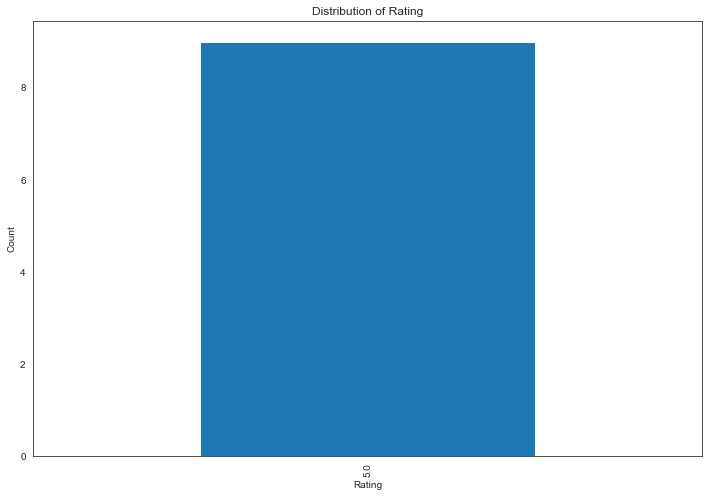

In [297]:
plt.figure(figsize=(12,8))
data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

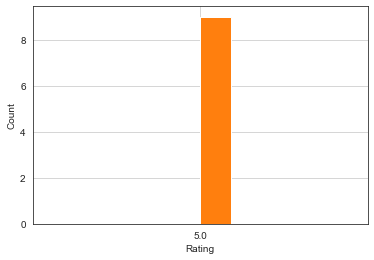

In [298]:
data.Rating.hist()
data.Rating.hist(bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')

In [299]:
data.iloc[:,[3]]

,Reviews
0,I spend hours in the comparative analysis of...
1,Thanks to Amazon and the seller for selling ...
2,Excellent product. Recommended
3,Excellent
4,good
5,Good
6,👍👍👍
7,Good value
8,Not for gamingIt's for those who.want to buy...


In [300]:

Reviews=data.iloc[:,[3]]

In [301]:
Reviews.shape

(9, 1)

In [302]:
Reviews.describe()

,Reviews
count,9
unique,9
top,good
freq,1


In [303]:
Reviews.dtypes

Reviews    object
dtype: object

In [304]:
# removing customer name and reviw title column as they have not that significance in output##
data.drop(["Customer Name","Review Title"],axis=1,inplace=True)

data.head()

,Rating,Reviews
0,5.0,I spend hours in the comparative analysis of...
1,5.0,Thanks to Amazon and the seller for selling ...
2,5.0,Excellent product. Recommended
3,5.0,Excellent
4,5.0,good


In [305]:
## Cleaning the text input for betting understanding of Machine..##

##Converting all review into Lowercase..###
data['Reviews']= data['Reviews'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [306]:
## removing punctuation from review..#
import string
data['Reviews']=data['Reviews'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [307]:
## Remove Numbers from review...##
data['Reviews']=data['Reviews'].str.replace('[0-9]','')

In [308]:
## removing all stopwords(english)....###
from nltk.corpus import stopwords

In [311]:
stop_words=stopwords.words('english')

In [312]:
data['Reviews']=data['Reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))


In [313]:
data.head(5)

,Rating,Reviews
0,5.0,spend hours comparative analysis usage windows...
1,5.0,thanks amazon seller selling quality products ...
2,5.0,excellent product recommended
3,5.0,excellent
4,5.0,good


In [314]:
from textblob import Word
data['Reviews']= data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
data['Reviews']= data['Reviews'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [315]:
data['Reviews'].head()

0    spend hour comparative analysis usage window  ...
1    thanks amazon seller selling quality product g...
2                        excellent product recommended
3                                            excellent
4                                                 good
Name: Reviews, dtype: object

In [316]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(data['Reviews'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

   amazon  analysis  buy  cable  charger  comparative  described  display  \
0       0         1    0      0        0            1          0        1   
1       1         0    0      0        0            0          0        0   
2       0         0    0      0        0            0          0        0   
3       0         0    0      0        0            0          0        0   
4       0         0    0      0        0            0          0        0   
5       0         0    0      0        0            0          0        0   
6       0         0    0      0        0            0          0        0   
7       0         0    0      0        0            0          0        0   
8       0         0    2      1        1            0          1        0   

   doesnt  dont  ...  time  usage  use  using  value  want  whowant  window  \
0       0     0  ...     0      1    1      0      0     0        0       1   
1       0     0  ...     0      0    0      0      1     0        0    

In [317]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(data['Reviews'])
print(TFIDF)

  (0, 45)	0.23760158237331974
  (0, 38)	0.23760158237331974
  (0, 13)	0.23760158237331974
  (0, 27)	0.23760158237331974
  (0, 10)	0.23760158237331974
  (0, 41)	0.23760158237331974
  (0, 26)	0.23760158237331974
  (0, 49)	0.23760158237331974
  (0, 43)	0.23760158237331974
  (0, 7)	0.23760158237331974
  (0, 28)	0.23760158237331974
  (0, 25)	0.23760158237331974
  (0, 54)	0.20068207920192474
  (0, 48)	0.23760158237331974
  (0, 1)	0.23760158237331974
  (0, 5)	0.23760158237331974
  (0, 19)	0.23760158237331974
  (0, 42)	0.23760158237331974
  (1, 29)	0.2343117004311495
  (1, 51)	0.2343117004311495
  (1, 18)	0.2343117004311495
  (1, 32)	0.468623400862299
  (1, 34)	0.5548360970987032
  (1, 40)	0.2774180485493516
  (1, 39)	0.2774180485493516
  :	:
  (8, 16)	0.16869349243874776
  (8, 20)	0.16869349243874776
  (8, 14)	0.16869349243874776
  (8, 52)	0.16869349243874776
  (8, 9)	0.3373869848774955
  (8, 37)	0.16869349243874776
  (8, 22)	0.16869349243874776
  (8, 24)	0.16869349243874776
  (8, 47)	0.16869

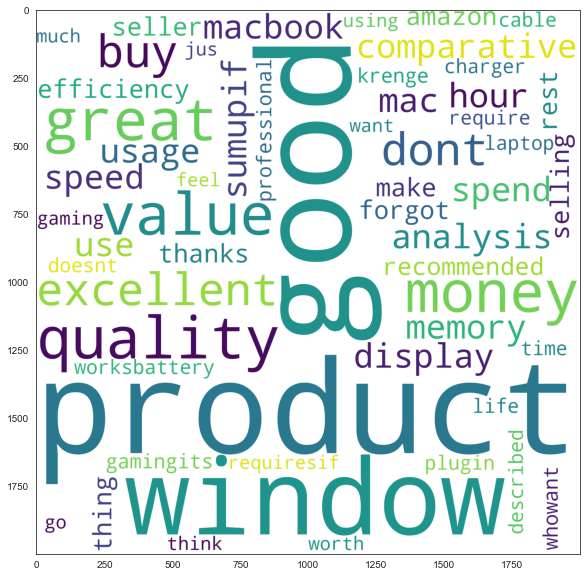

In [318]:

Review_wordcloud = ' '.join(data['Reviews'])
Q_wordcloud=WordCloud(
                    background_color='white',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

# Removing Punctuation

In [333]:
data['Reviews'] = data['Reviews'].str.replace('[^\w\s]','')
data['Reviews'].head()

0    spend hour comparative analysis usage window  ...
1    thanks amazon seller selling quality product g...
2                        excellent product recommended
3                                            excellent
4                                                 good
Name: Reviews, dtype: object

#  Common word removal

In [332]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[:10]
freq

product      3
good         3
value        2
quality      2
excellent    2
great        2
money        2
dont         2
buy          2
window       2
dtype: int64

# Now, let’s remove these words as their presence will not of any use in classification of our text data.

In [343]:

data['Reviews'] = data['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Reviews'].head()


0    spend hour comparative analysis usage mac memo...
1                         thanks amazon seller selling
2                                          recommended
3                                                     
4                                                     
Name: Reviews, dtype: object

#  Rare words removal

In [330]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[-10:]
freq


forgot         1
feel           1
charger        1
memory         1
spend          1
selling        1
laptop         1
macbook        1
comparative    1
thanks         1
dtype: int64

In [345]:
from textblob import TextBlob
data['Reviews'][:10].apply(lambda x: str(TextBlob(x).correct()))

0    spend hour comparative analysis usage mac memo...
1                         thanks amazon seller selling
2                                          recommended
3                                                     
4                                                     
5                                                     
6                                                     
7                                                     
8    gamingits whowant range professional worksbatt...
Name: Reviews, dtype: object

# 2.7 Tokenization

In [349]:
TextBlob(data['Reviews'][0]).words

WordList(['spend', 'hour', 'comparative', 'analysis', 'usage', 'mac', 'memory', 'display', 'sumupif', 'use', 'macbook', 'speed', 'efficiency', 'make', 'forgot', 'rest', 'thing'])

In [351]:
TextBlob(data['Reviews'][1]).words

WordList(['thanks', 'amazon', 'seller', 'selling'])

# Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, we will use PorterStemmer from the NLTK library.

In [352]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Reviews'][:10].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    spend hour compar analysi usag mac memori disp...
1                             thank amazon seller sell
2                                            recommend
3                                                     
4                                                     
5                                                     
6                                                     
7                                                     
8    gamingit whowant kreng profession worksbatteri...
Name: Reviews, dtype: object

# Lemmatization

In [353]:
from textblob import Word
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Reviews'].head()


0    spend hour comparative analysis usage mac memo...
1                         thanks amazon seller selling
2                                          recommended
3                                                     
4                                                     
Name: Reviews, dtype: object

# Advance Text Processing
# N-grams

In [354]:
TextBlob(data['Reviews'][0]).ngrams(2)

[WordList(['spend', 'hour']),
 WordList(['hour', 'comparative']),
 WordList(['comparative', 'analysis']),
 WordList(['analysis', 'usage']),
 WordList(['usage', 'mac']),
 WordList(['mac', 'memory']),
 WordList(['memory', 'display']),
 WordList(['display', 'sumupif']),
 WordList(['sumupif', 'use']),
 WordList(['use', 'macbook']),
 WordList(['macbook', 'speed']),
 WordList(['speed', 'efficiency']),
 WordList(['efficiency', 'make']),
 WordList(['make', 'forgot']),
 WordList(['forgot', 'rest']),
 WordList(['rest', 'thing'])]

# Term frequency

In [361]:
tf1 = (data['Reviews'][1:10]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,selling,1.0
1,seller,1.0
2,amazon,1.0
3,thanks,1.0
4,recommended,1.0
5,,5.0
6,requiresif,1.0
7,time,1.0
8,go,1.0
9,laptop,1.0


# Inverse Document Frequency

In [364]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Reviews'].str.contains(word)])))

In [365]:
tf1

,words,tf,idf
0,selling,1.0,2.197225
1,seller,1.0,2.197225
2,amazon,1.0,2.197225
3,thanks,1.0,2.197225
4,recommended,1.0,2.197225
5,,5.0,0.000000
6,requiresif,1.0,2.197225
7,time,1.0,2.197225
8,go,1.0,1.504077
9,laptop,1.0,2.197225


# Term Frequency – Inverse Document Frequency (TF-IDF)

In [366]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,selling,1.0,2.197225,2.197225
1,seller,1.0,2.197225,2.197225
2,amazon,1.0,2.197225,2.197225
3,thanks,1.0,2.197225,2.197225
4,recommended,1.0,2.197225,2.197225
5,,5.0,0.000000,0.000000
6,requiresif,1.0,2.197225,2.197225
7,time,1.0,2.197225,2.197225
8,go,1.0,1.504077,1.504077
9,laptop,1.0,2.197225,2.197225


In [367]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
data_vect = tfidf.fit_transform(data['Reviews'])

data_vect

<9x45 sparse matrix of type '<class 'numpy.float64'>'
	with 45 stored elements in Compressed Sparse Row format>

# Bag of Words

In [368]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(data['Reviews'])
data_bow

<9x47 sparse matrix of type '<class 'numpy.int64'>'
	with 47 stored elements in Compressed Sparse Row format>

# Sentiment Analysis

In [370]:
data['Reviews'][:10].apply(lambda x: TextBlob(x).sentiment)

0                                    (0.0, 0.0)
1                                    (0.2, 0.2)
2                                    (0.0, 0.0)
3                                    (0.0, 0.0)
4                                    (0.0, 0.0)
5                                    (0.0, 0.0)
6                                    (0.0, 0.0)
7                                    (0.0, 0.0)
8    (0.20000000000000004, 0.13333333333333333)
Name: Reviews, dtype: object

# Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. This can also work as a feature for building a machine learning model.

In [376]:
data['sentiment'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Reviews','sentiment']].head()

,Reviews,sentiment
0,spend hour comparative analysis usage mac memo...,0.0
1,thanks amazon seller selling,0.2
2,recommended,0.0
3,,0.0
4,,0.0


# Word Embeddings

In [380]:
!pip install gensim
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [435]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'negative-word.txt'
word2vec_output_file = 'positive-word.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(4782, 0)

In [320]:

import collections
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pcs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [321]:
from textblob import TextBlob
data['polarity'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0])
data[['Reviews','polarity']].head(5)

,Reviews,polarity
0,spend hour comparative analysis usage window ...,0.0
1,thanks amazon seller selling quality product g...,0.5
2,excellent product recommended,1.0
3,excellent,1.0
4,good,0.7


In [322]:
# Displaying top 5 positive posts of Category_A
data[data.polarity>0].head(5)

,Rating,Reviews,polarity
1,5.0,thanks amazon seller selling quality product g...,0.5
2,5.0,excellent product recommended,1.0
3,5.0,excellent,1.0
4,5.0,good,0.7
5,5.0,good,0.7


In [323]:
def sent_type(text): 
    for i in (text):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [324]:
sent_type(data['polarity'])

neutral
positive
positive
positive
positive
positive
neutral
positive
positive


In [325]:
data["category"]=data['polarity']

In [326]:
data.loc[data.category > 0,'category']="Positive"
data.loc[data.category !='Positive','category']="Negative"

In [327]:
data["category"]=data["category"].astype('category')
data.dtypes

Rating        object
Reviews       object
polarity     float64
category    category
dtype: object

<AxesSubplot:xlabel='category', ylabel='count'>

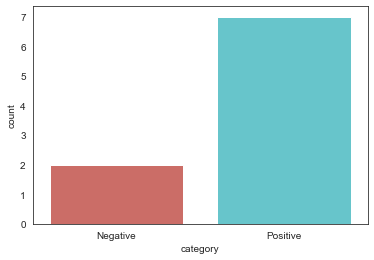

In [328]:
sns.countplot(x='category',data=data,palette='hls')

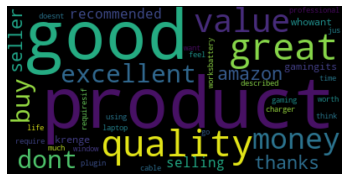

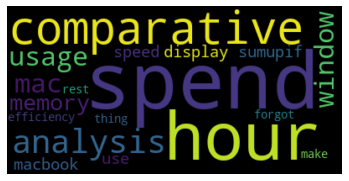

In [329]:
positive_reviews= data[data.category=='Positive']
negative_reviews= data[data.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.Reviews.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.Reviews.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()

# Thus a Sentiment Analysis in Made on Amazon Reviews 